<a href="https://colab.research.google.com/github/SumanRBangera/Arecanut-Quality-Classification-Using-CNN/blob/main/Training_Model_Arecanut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from sklearn.datasets import load_files
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

# Define the path to your dataset folder
dataset_dir = '/content/drive/My Drive/Dataset_Images'

# Define the list of categories (grades)
categories = ['High_Quality', 'Low_Quality', 'Medium_Quality']

# Create empty lists to store images and labels
images = []
labels = []

# Loop through the categories
for label, category in enumerate(categories):
    category_dir = os.path.join(dataset_dir, category)

    for filename in os.listdir(category_dir):
        if filename.endswith('.jpg'):
            image_path = os.path.join(category_dir, filename)

            # Load and preprocess the image using OpenCV
            img = cv2.imread(image_path)
            img = cv2.resize(img, (128, 128))  # Resize the image to a consistent size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format if necessary

            # Normalize the pixel values to the range [0, 1]
            img = img / 255.0

            images.append(img)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data to ensure random ordering
images, labels = shuffle(images, labels, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set the hyperparameters
dense_units = 64
filters = 64
kernel_size = (5, 5)
pool_size = (2, 2)

# Build the CNN model
model = Sequential()

#  the first convolutional layer with MaxPooling
model.add(Conv2D(filters, kernel_size, input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))

In [ ]:
#  a second convolutional layer with MaxPooling
model.add(Conv2D(filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))

In [ ]:
# Flatten the output before the dense layers
model.add(Flatten())

In [ ]:
# Add a dense layer with ReLU activation
model.add(Dense(dense_units, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Output layer with three units for the three categories and softmax activation
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=30, batch_size=32)

Epoch 1/30
46/46 [==============================] - 121s 3s/step - loss: 1.0003 - accuracy: 0.5267 - val_loss: 0.6547 - val_accuracy: 0.7514
Epoch 2/30
46/46 [==============================] - 115s 2s/step - loss: 0.6610 - accuracy: 0.6867 - val_loss: 0.4926 - val_accuracy: 0.8224
Epoch 3/30
46/46 [==============================] - 118s 3s/step - loss: 0.5531 - accuracy: 0.7510 - val_loss: 0.5268 - val_accuracy: 0.7541
Epoch 4/30
46/46 [==============================] - 125s 3s/step - loss: 0.5474 - accuracy: 0.7722 - val_loss: 0.6035 - val_accuracy: 0.7295
Epoch 5/30
46/46 [==============================] - 117s 3s/step - loss: 0.5328 - accuracy: 0.7668 - val_loss: 0.3726 - val_accuracy: 0.8552
Epoch 6/30
46/46 [==============================] - 115s 3s/step - loss: 0.4366 - accuracy: 0.8181 - val_loss: 0.4244 - val_accuracy: 0.7896
Epoch 7/30
46/46 [==============================] - 128s 3s/step - loss: 0.3987 - accuracy: 0.8447 - val_loss: 0.3555 - val_accuracy: 0.8443
Epoch 8/30
46

In [ ]:
# Save the trained CNN model
model.save('/content/drive/My Drive/arecanut_quality_CNN_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load your pre-trained CNN model
cnn_model_path = '/content/drive/My Drive/arecanut_quality_CNN_model.h5'
cnn_model = load_model(cnn_model_path)

# Evaluate the CNN model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy (CNN Model): {test_accuracy}')

12/12 [==============================] - 7s 538ms/step - loss: 0.3671 - accuracy: 0.8852
Test Accuracy (CNN Model): 0.8852459192276001


# Predicting the quality for unseen data

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/arecanut_quality_CNN_model.h5')

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load your pre-trained CNN model
model_path = '/content/drive/My Drive/arecanut_quality_CNN_model.h5'
model = load_model(model_path)

def predict_quality(image_path):
    try:
        # Open the image
        img = Image.open(image_path)

        # Resize the image to match the input size expected by your model
        img = img.resize((128, 128))

        # Convert image to array and normalize
        img_array = np.array(img) / 255.0

        # Expand dimensions to match the input shape expected by the model
        img_array = np.expand_dims(img_array, axis=0)

        # Make predictions
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Map the predicted class to the corresponding quality grade
        label_names = ['High_Quality', 'Low_Quality', 'Medium_Quality']
        predicted_class_label = label_names[predicted_class]

        # Construct result string with percentages of all classes
        result_string = ""
        for i in range(len(label_names)):
            class_prob = prediction[0][i]
            class_label = label_names[i]
            result_string += f"{class_label}: {class_prob*100:.2f}%, "

        full_final_result = result_string[:-2]  # Remove trailing comma and space
        return f"Predicted Class: {predicted_class_label}\nConfidence: {full_final_result}"

    except Exception as e:
        return str(e)

# Example usage
image_path = '/content/drive/MyDrive/New_Images/High_Quality/High05.jpg'
prediction_result = predict_quality(image_path)
print(prediction_result)


1/1 [==============================] - 0s 481ms/step
Predicted Class: High_Quality
Confidence: High_Quality: 100.00%, Low_Quality: 0.00%, Medium_Quality: 0.00%


In [ ]:
print("----------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------


In [ ]:
print("----------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------


In [ ]:
print("----------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------


# SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_model = SVC(C=1, kernel='poly', gamma=0.1)

# Train the SVM classifier
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

SVC(C=1, gamma=0.1, kernel='poly')

In [ ]:
# Train and evaluate SVM model
svm_model = SVC(C=1, kernel='poly', gamma=1)
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train_encoded)
svm_test_predictions = svm_model.predict(X_test.reshape(X_test.shape[0], -1))
svm_test_accuracy = accuracy_score(y_test_encoded, svm_test_predictions)
print(f'SVM Test Accuracy: {svm_test_accuracy}')

SVM Test Accuracy: 0.8333333333333334


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Reshape images for Gaussian Naive Bayes
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_flat, y_train_encoded)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_flat)

# Evaluate the Naive Bayes classifier
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)
print("Naive Bayes Test Accuracy:", accuracy_nb)



Naive Bayes Test Accuracy: 0.6147540983606558


# XGBoost

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate CNN model on the test set
cnn_test_predictions = model.predict(X_test)
cnn_test_predictions = np.argmax(cnn_test_predictions, axis=1)  # Convert one-hot encoded predictions to labels
cnn_conf_matrix = confusion_matrix(y_test_encoded, cnn_test_predictions)


12/12 [==============================] - 12s 923ms/step


CNN Confusion Matrix:
[[135   1   9]
 [  1 105  10]
 [ 14   7  84]]


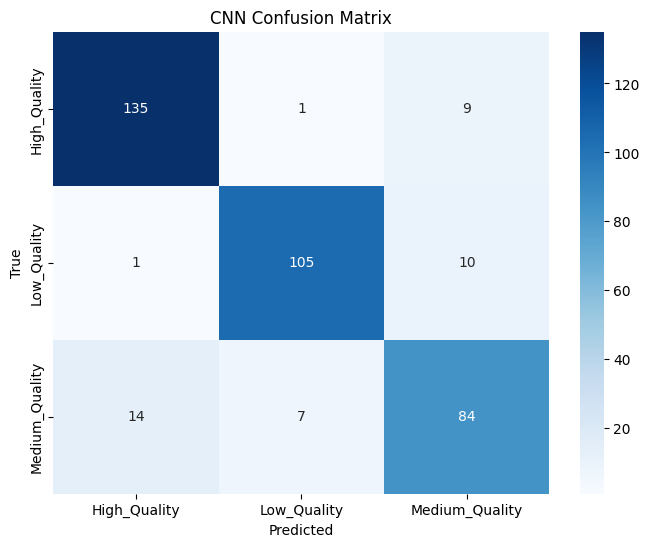

In [ ]:
# Print CNN confusion matrix
print("CNN Confusion Matrix:")
print(cnn_conf_matrix)

# Plot CNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Evaluate CNN model on the test set
cnn_test_predictions = model.predict(X_test)
cnn_test_predictions = np.argmax(cnn_test_predictions, axis=1)  # Convert one-hot encoded predictions to labels

# Print classification report for CNN
print("CNN Classification Report:")
print(classification_report(y_test_encoded, cnn_test_predictions, target_names=categories))


12/12 [==============================] - 12s 973ms/step
CNN Classification Report:
                precision    recall  f1-score   support

  High_Quality       0.90      0.93      0.92       145
   Low_Quality       0.93      0.91      0.92       116
Medium_Quality       0.82      0.80      0.81       105

      accuracy                           0.89       366
     macro avg       0.88      0.88      0.88       366
  weighted avg       0.89      0.89      0.88       366



In [ ]:
from sklearn.metrics import f1_score

# Calculate overall F1-score for CNN
cnn_f1_score = f1_score(y_test_encoded, cnn_test_predictions, average='weighted')
print(f'CNN Overall F1-Score: {cnn_f1_score}')


CNN Overall F1-Score: 0.8849592966284162


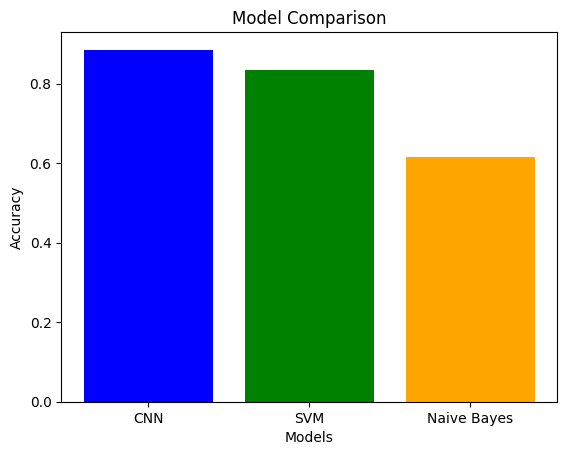

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = [test_accuracy, svm_test_accuracy, accuracy_nb]

# Model names
models = ['CNN', 'SVM', 'Naive Bayes']

# Create a bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Display the bar chart
plt.show()
